# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

Two-sample Z-test p-value: 0.9639333330262475
Chi-square test p-value for independence: 0.6150123339426765


<AxesSubplot: xlabel='age', ylabel='Count'>

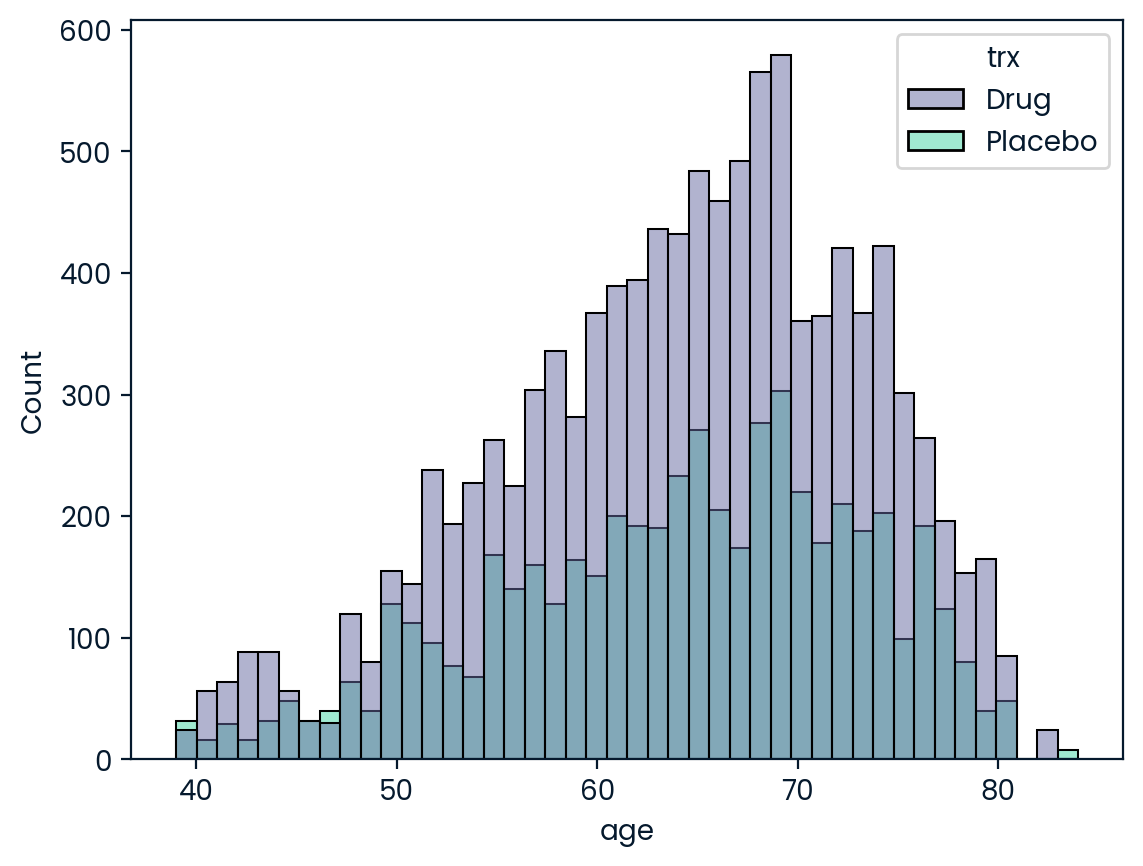

In [10]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)

# Store the p-value
two_sample_p_value = two_sample_results[1]
print("Two-sample Z-test p-value:", two_sample_p_value)

# Determine if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")

# Extract the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]
print("Chi-square test p-value for independence:", num_effects_p_value)

# Create a histogram with Seaborn
sns.histplot(data=drug_safety, x="age", hue="trx")



In [11]:
# To choose between unpaired t-test and Wilcoxon-Mann-Whitney test
normality = pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', # the default
    alpha=0.05) # 0.05 is also the default
print("\nNormality Test Results:\n", normality)

# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since the data distribution is not normal
# Conduct a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)

# Extract the p-value
age_group_effects_p_value = age_group_effects["p-val"]
print("Mann-Whitney U test p-value:", age_group_effects_p_value)

import datetime  # Import the datetime module
# Print the current date and time
now = datetime.datetime.now()
formatted_datetime = now.strftime("%Y-%m-%d %H:%M:%S")
print("\nDate and Time of Analysis:", formatted_datetime)


Normality Test Results:
                 W          pval  normal
trx                                    
Drug     0.976785  2.189152e-38   False
Placebo  0.975595  2.224950e-29   False
Mann-Whitney U test p-value: MWU    0.256963
Name: p-val, dtype: float64

Date and Time of Analysis: 2025-02-05 23:20:11


1. Two-sample Z-test p-value: 0.9639
Test Purpose:

The two-sample Z-test for proportions compares the proportion of participants experiencing adverse effects between the Drug and Placebo groups.

Interpretation:

A p-value of 0.9639 is significantly higher than the common significance level of 0.05.

Conclusion: There is no statistically significant difference in the proportion of adverse effects between the Drug and Placebo groups.

Implications:

Safety Profile: The new drug does not appear to increase or decrease the likelihood of adverse effects compared to the placebo.

This suggests that the drug's safety regarding adverse effects is comparable to that of the placebo group.

Chi-square test p-value for independence: 0.6150
Test Purpose:

The Chi-square test of independence examines whether there is an association between the number of adverse effects (num_effects) and the treatment group (trx).

Interpretation:

A p-value of 0.6150 indicates that any observed association is not statistically significant at the 0.05 level.

Conclusion: There is no significant association between the number of adverse effects and whether participants received the Drug or the Placebo.

Implications:

The distribution of the number of adverse effects is similar across both treatment groups.

This further supports the idea that the drug does not differ from the placebo in terms of safety as measured by the number of effects experienced.

Normality Test Results:
                W          pval  normal
trx                                    
Drug     0.976785  2.189152e-38   False
Placebo  0.975595  2.224950e-29   False
Test Purpose:

The Shapiro-Wilk test assesses whether the age distributions for each treatment group are normally distributed.

Interpretation:

Both groups have extremely small p-values (close to zero), much less than 0.05.

The W statistic measures how well the data fits a normal distribution; values close to 1 suggest normality, but the accompanying p-values indicate statistical significance.

The normal column is False for both groups.

Conclusion:

Age distributions for both the Drug and Placebo groups deviate significantly from normality.

The data violates the assumption of normality, which is crucial for parametric tests like the unpaired t-test.

Implications:

Since the assumption of normality is violated, it's appropriate to use non-parametric tests for comparing the age distributions between groups.

This justifies the use of the Mann-Whitney U test instead of the t-test.

Mann-Whitney U test p-value: 0.256963
MWU    0.256963
Name: p-val, dtype: float64
Test Purpose:

The Mann-Whitney U test is a non-parametric test used to determine whether there is a significant difference in the distributions of two independent samples.

Interpretation:

A p-value of 0.256963 is greater than the significance level of 0.05.

Conclusion: There is no statistically significant difference in age distributions between the Drug and Placebo groups.

Implications:

Age as a Variable: The ages of participants in both groups are statistically similar.

Confounding Factors: Age is unlikely to be a confounding factor affecting your comparison of adverse effects between the groups.

Final Observation:


Proportion of Adverse Effects: No significant difference between the Drug and Placebo groups.

Number of Adverse Effects: No significant association with the treatment group.

Age Distribution: Participants' ages are comparable across groups.


Date and Time of Analysis: 2025-02-05 23:18:45
